In [20]:
import pandas as pd 

# read the csv file 
df = pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [21]:
# print the first 5 rows of the data set

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
# shape of the dataframe

df.shape

(10000, 3)

In [10]:
# data type of each coulmn

df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [11]:
# number of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
# number of unique values of column Gender

df.Gender.nunique()

2

In [13]:
# unique values of column Gender

df.Gender.unique()

array(['Male', 'Female'], dtype=object)

Text(0, 0.5, 'frequency')

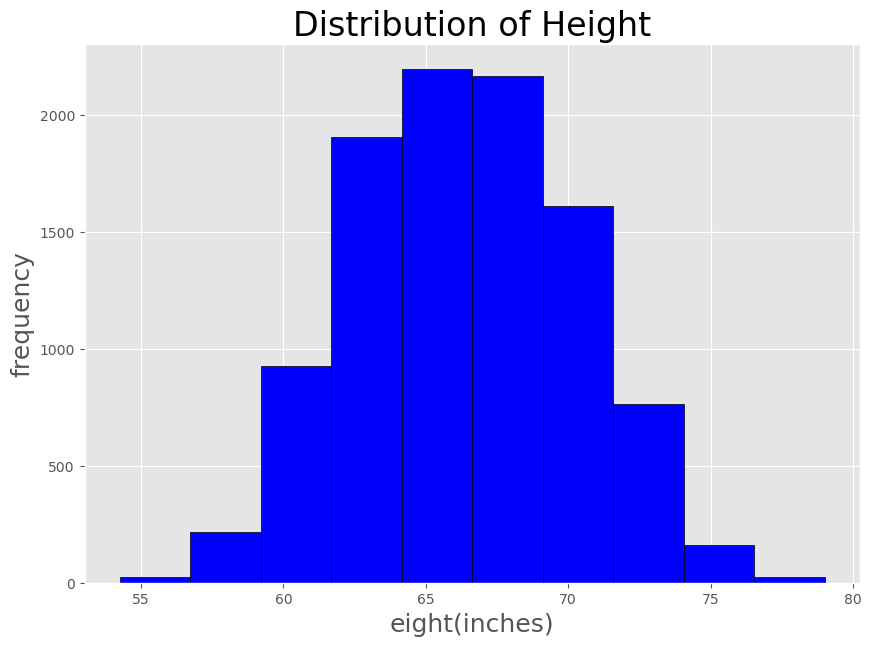

In [16]:
import matplotlib.pyplot as plt 

plt.style.use('ggplot')


# histogram of the height

df.Height.plot(kind='hist', color = 'blue', edgecolor= 'black', figsize = (10,7))
plt.title('Distribution of Height',size = 24)
plt.xlabel('eight(inches)',size = 18)
plt.ylabel('frequency', size = 18)

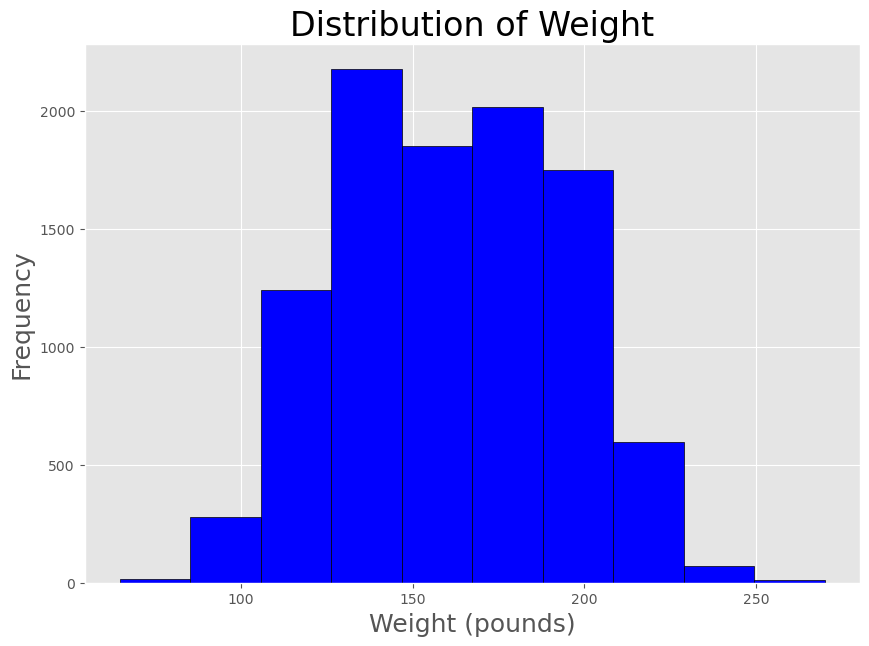

In [17]:
# histogram of the weight

df.Weight.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

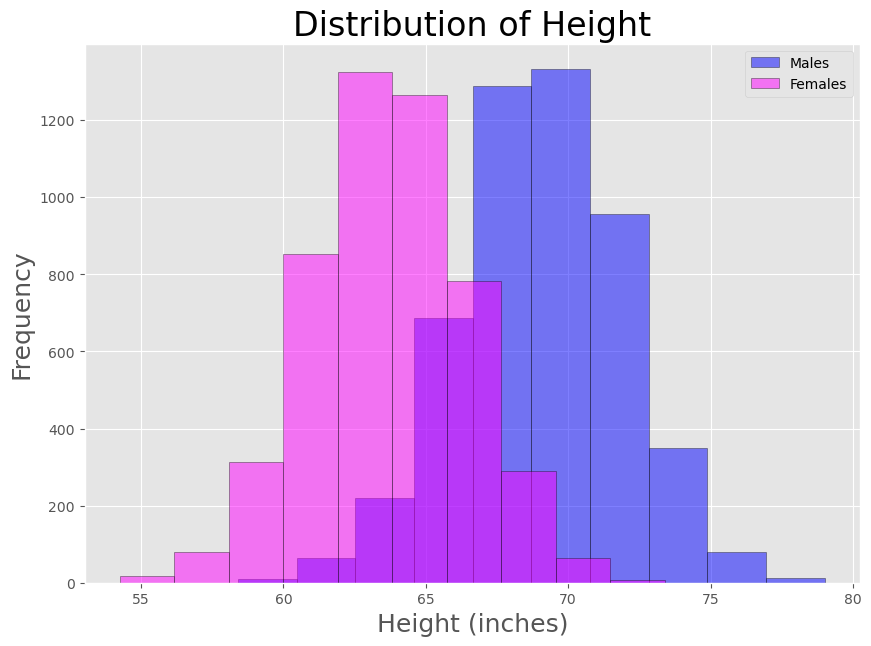

In [7]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black',
alpha=0.5, figsize=(10, 7))

plt.legend(labels=['Males', 'Females'])

plt.title('Distribution of Height', size=24)

plt.xlabel('Height (inches)', size=18)

plt.ylabel('Frequency', size=18);

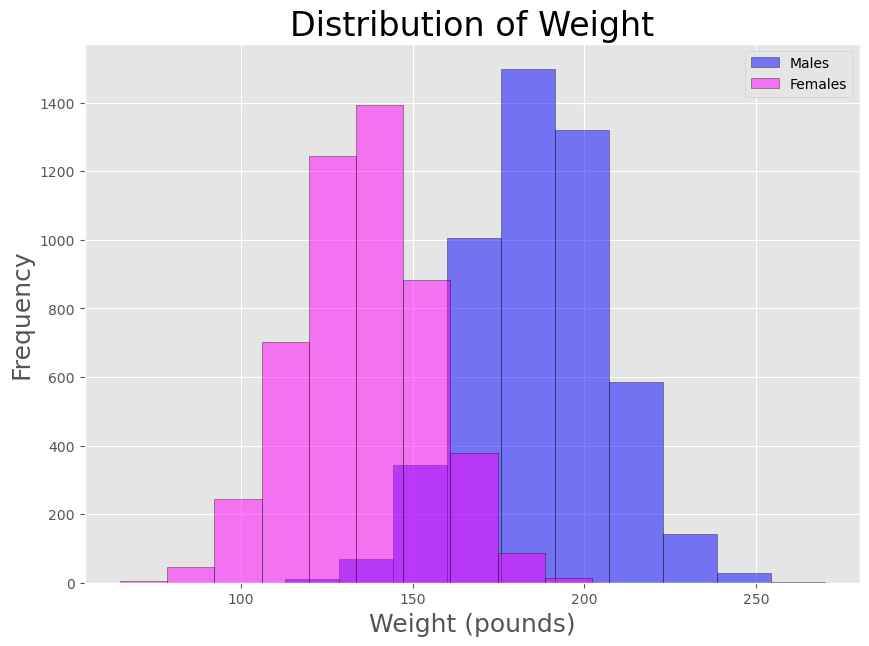

In [8]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black',
alpha=0.5, figsize=(10, 7))

plt.legend(labels=['Males', 'Females'])

plt.title('Distribution of Weight', size=24)

plt.xlabel('Weight (pounds)', size=18)

plt.ylabel('Frequency', size=18);

In [9]:
# Descriptive statistics male

statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female

statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female

statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


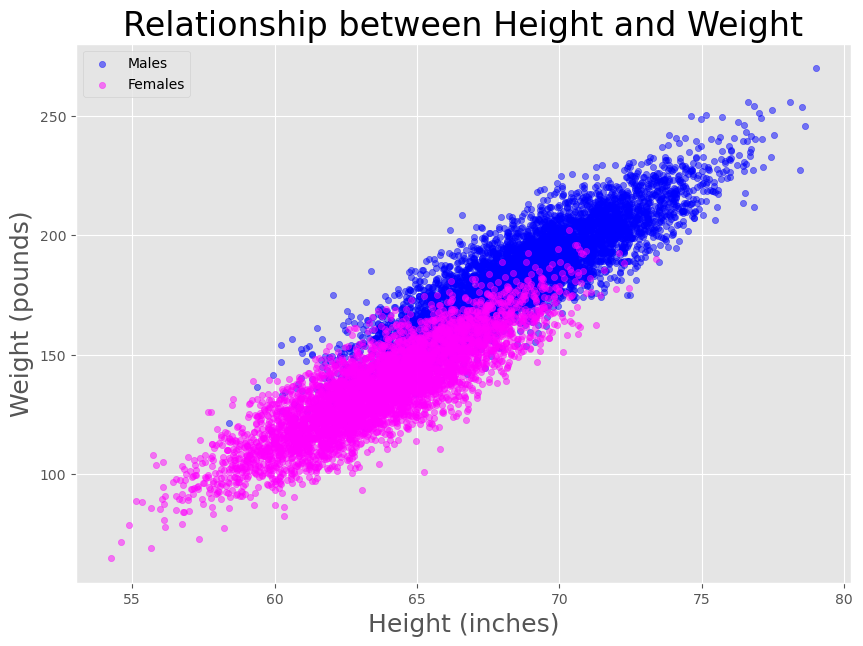

In [10]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta',
alpha=0.5, figsize=(10 ,7), ax=ax1)

plt.legend(labels=['Males', 'Females'])

plt.title('Relationship between Height and Weight', size=24)

plt.xlabel('Height (inches)', size=18)

plt.ylabel('Weight (pounds)', size=18);

# Scatter plot of 500 females

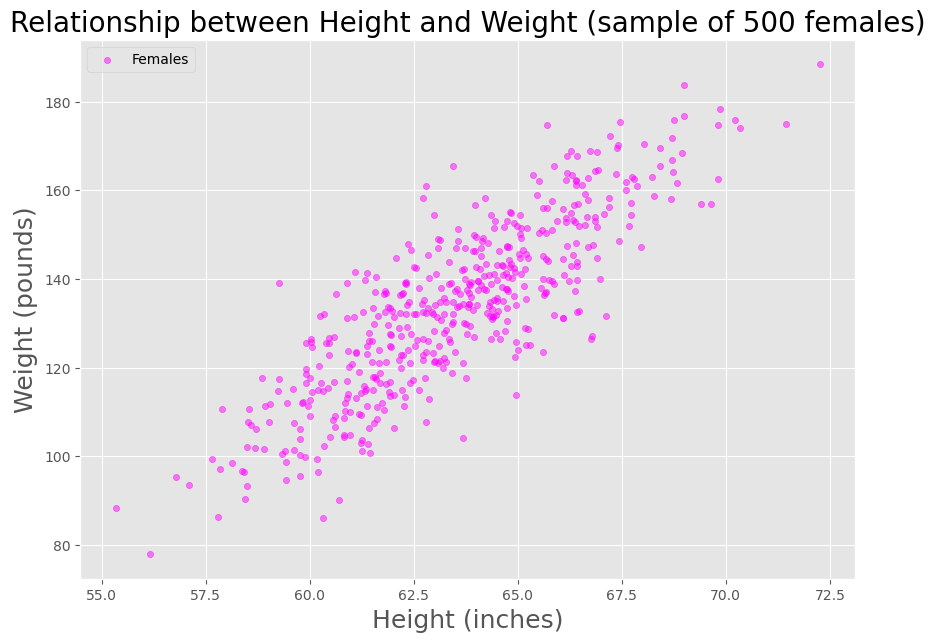

In [11]:
sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5,
figsize=(10, 7))

plt.legend(labels=['Females'])

plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)

plt.xlabel('Height (inches)', size=18)

plt.ylabel('Weight (pounds)', size=18);

In [18]:
import numpy as np

# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([ 5.96177381, -224.49884071])

# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([ 5.99404661, -246.01326575])

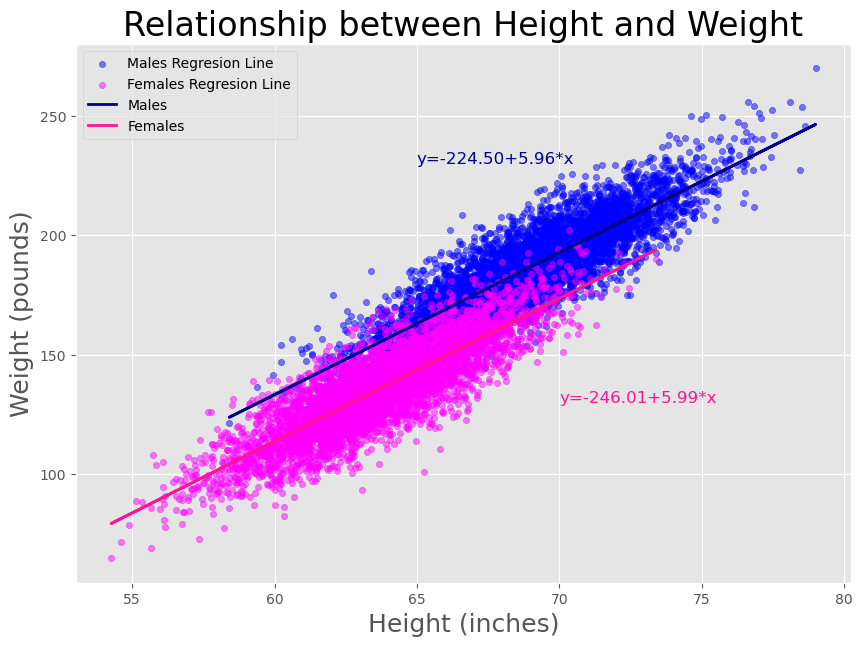

In [13]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5,
figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=
(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue',
linewidth=2)

plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1],
color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue',
size=12)

plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink',
size=12)

# legend, title and labels.

plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])

plt.title('Relationship between Height and Weight', size=24)

plt.xlabel('Height (inches)', size=18)

plt.ylabel('Weight (pounds)', size=18);

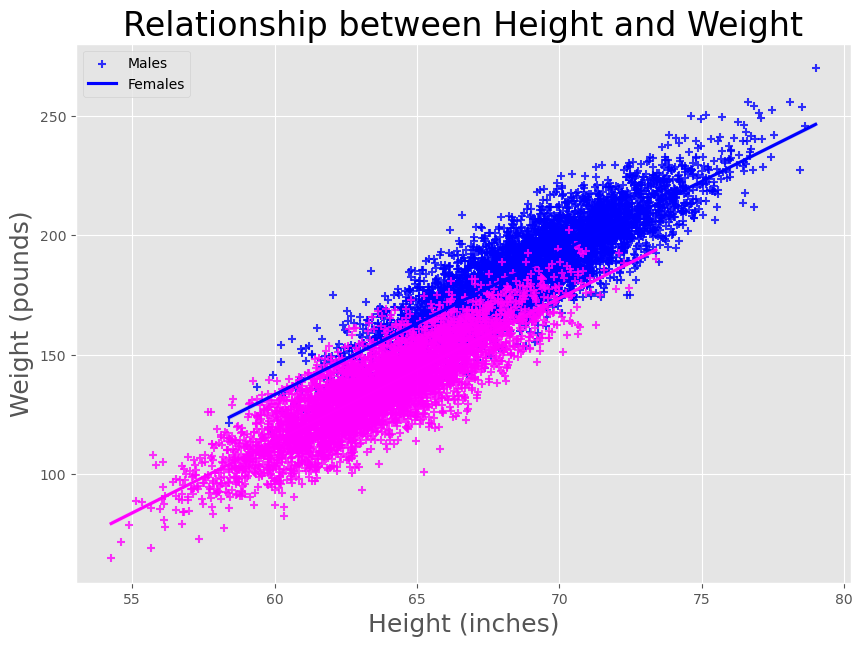

In [14]:
import seaborn as sns

# regression plot using seaborn

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.

plt.legend(labels=['Males', 'Females'])

plt.title('Relationship between Height and Weight', size=24)

plt.xlabel('Height (inches)', size=18)

plt.ylabel('Weight (pounds)', size=18);

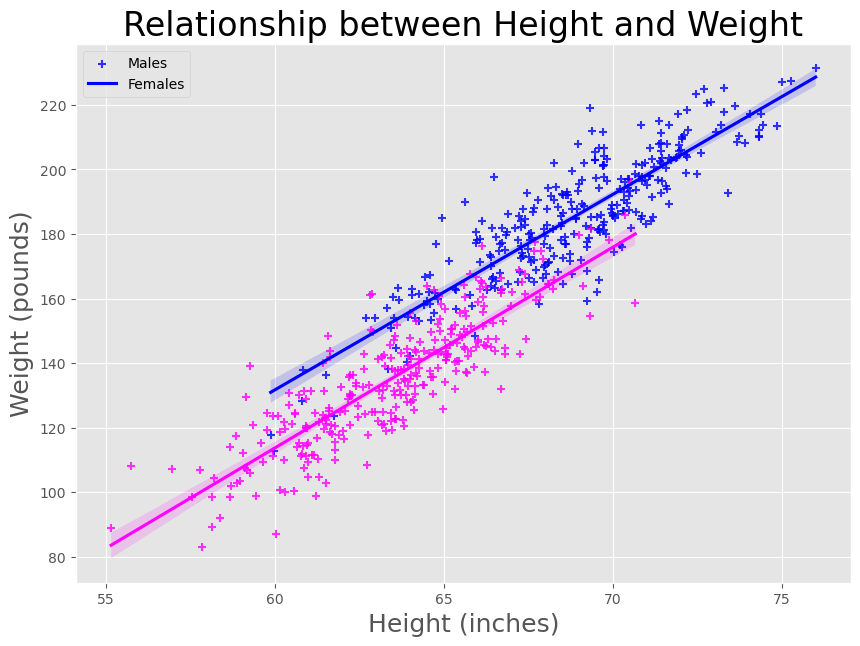

In [22]:
import seaborn as sns

# 300 random samples

df_males_sample = df[df['Gender'] == 'Male'].sample(300)
df_females_sample = df[df['Gender'] == 'Female'].sample(300)

# regression plot using seaborn

fig = plt.figure(figsize=(10, 7))

sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')

sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta',
marker='+')

# legend, title, and labels.

plt.legend(labels=['Males', 'Females'])

plt.title('Relationship between Height and Weight', size=24)

plt.xlabel('Height (inches)', size=18)

plt.ylabel('Weight (pounds)', size=18);

In [15]:
from sklearn.linear_model import LinearRegression

df_males = df[df['Gender'] == 'Male']

# create linear regression object

lr_males = LinearRegression()

# fit linear regression

lr_males.fit(df_males[['Height']], df_males['Weight'])

# get the slope and intercept of the line best fit

print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# 5.96177381


df_females = df[df['Gender'] == 'Female']

# create linear regression object

lr_females = LinearRegression()

# fit linear regression

lr_females.fit(df_females[['Height']], df_females['Weight'])

# get the slope and intercept of the line best fit
print(lr_females.intercept_)
# -246.01326574667277

print(lr_females.coef_)
# 5.99404661

-224.49884070545846
[5.96177381]
-246.01326574667243
[5.99404661]


In [16]:
df_females = df[df['Gender'] == 'Female']

# fit the model using numpy
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

# predictions using numpy
print(np.polyval(female_fit, [60]))
# [113.62953114]

# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])

# predictions using scikit learn
print(lr_females.predict([[60]]))
# [113.62953114]

[113.62953114]
[113.62953114]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
# dataframe containing only females

df_females = df[df['Gender'] == 'Females']

# correlation coefficients

df_females.corr()

,Gender,Height,Weight
Gender,NaN,NaN,NaN
Height,NaN,NaN,NaN
Weight,NaN,NaN,NaN


In [25]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Males']

# correlation coefficients
df_males.corr()

,Gender,Height,Weight
Gender,NaN,NaN,NaN
Height,NaN,NaN,NaN
Weight,NaN,NaN,NaN


In [26]:
from scipy import stats

# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)

# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)

0.8496085914186009
0.8629788486163176


# Residual Plot

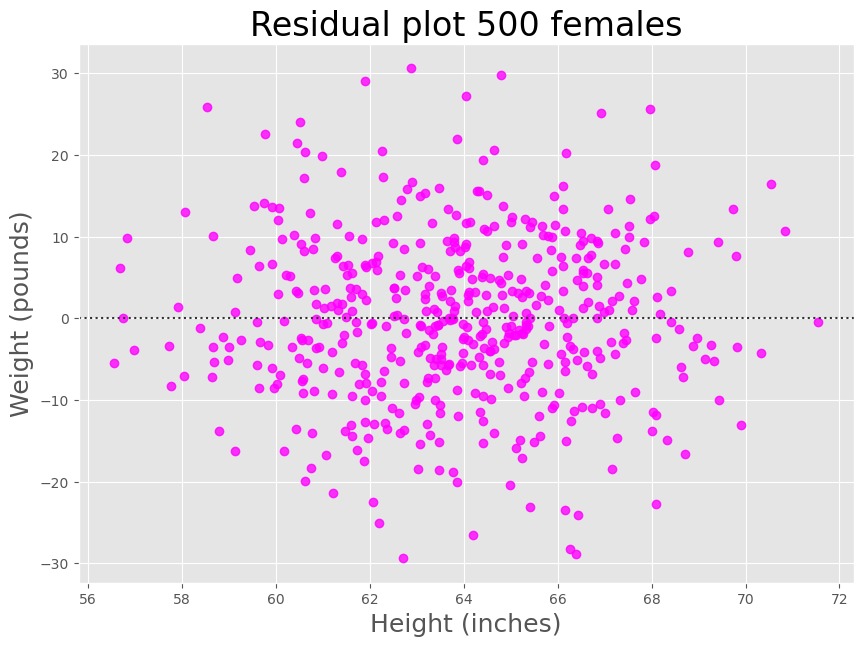

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Assuming 'Gender', 'Height', and 'Weight' are columns in your DataFrame

# dataframe containing only females
df_females = df[df['Gender'] == 'Female'].sample(500, random_state=42)

# residual plot 500 females
fig , ax = plt.subplots(figsize=(10, 7))
sns.residplot(x = 'Height', y = 'Weight' ,data=df_females, color='magenta', ax= ax)

# title and labels
plt.title('Residual plot 500 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

# show the plot
plt.show()

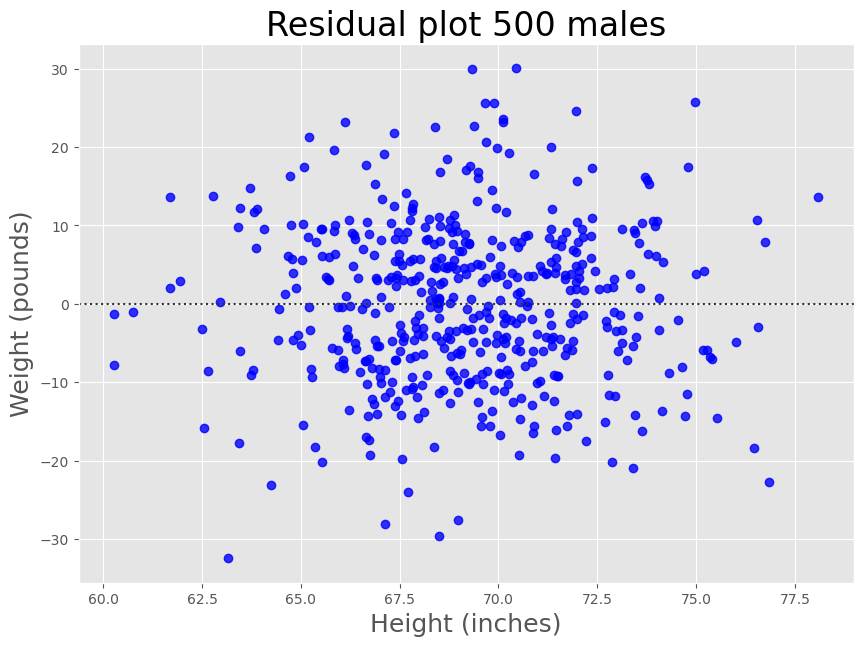

In [44]:
# Filter DataFrame for males and sample 500 data points
df_males = df[df['Gender'] == 'Male'].sample(500, random_state=42) 

# residual plot 500 males
fig, ax =  plt.subplots(figsize=(10, 7))
sns.residplot(x = 'Height',y = 'Weight', data = df_males, color='blue',ax=ax)

# title and labels
plt.title('Residual plot 500 males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

# show the plot 
plt.show()


# Multiple linear regression

In [32]:
# drop female column

df_dummy.drop('Gender_Female', axis=1, inplace=True)

# rename Gender_Male column

df_dummy.rename(columns={'Gender_Male': 'Gender'}, inplace=True)

# df_dummy dataframe first 5 columns

df_dummy.head()

NameError: name 'df_dummy' is not defined

In [33]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df_dummy[['Height', 'Gender']], df_dummy['Weight'])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]

NameError: name 'df_dummy' is not defined